In [197]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pydantic import validate_call, Field
from typing import Annotated, Sequence
from scipy.interpolate import make_interp_spline
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from scipy.stats import (
    bernoulli, binom, hypergeom, geom, nbinom, poisson, betabinom, multinomial, 
    uniform, norm, expon, gamma, beta, weibull_min, pareto, cauchy, logistic, lognorm, t, chi2, gumbel_r, laplace, multivariate_normal, dirichlet
)

OUT_DIR = os.path.join(os.path.abspath(""), "pmfs_and_pdfs")
COLOR_PALETTE = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    "#8c564b", "#e377c2", "#bcbd22", "#17becf"
]

# Discrete

In [161]:
def check_params(*params):
    param_len = None
    for param in params:
        if param_len is None:
            param_len = len(param) if isinstance(param, Sequence) else 1
        else:
            current_len = len(param) if isinstance(param, Sequence) else 1
            if current_len != 1 and current_len != param_len:
                raise ValueError("All parameters must be of the same length or scalars.")
    # return param_len

# ──────────────────────────────────────────────
# BERNOULLI
# ──────────────────────────────────────────────
@validate_call
def plot_bernoulli_pmf(
    p: float | Sequence[float],
    dark: bool = True,
    out: bool | str = True,
    show: bool = True
):
    p_vals = np.atleast_1d(p)
    if np.any((p_vals <= 0) | (p_vals >= 1)):
        raise ValueError("All p must be in (0, 1).")

    plt.style.use("dark_background") if dark else plt.style.use("default")
    plt.figure(figsize=(8, 5))

    for i, p_i in enumerate(p_vals):
        x = [0, 1]
        pmf = bernoulli.pmf(x, p_i)
        color = COLOR_PALETTE[i % len(COLOR_PALETTE)]
        label = f"p={p_i:.2f}"
        # plt.plot(x, pmf, marker='o', linestyle='None', color=color, label=label)
        plt.bar(x, pmf, width=0.15, color=color, alpha=0.8, label=label, align='center')

    plt.xticks([0, 1], ["0", "1"])
    plt.xlabel("x")
    plt.ylabel("P(X = x)")
    plt.title("Bernoulli PMF")
    plt.legend(frameon=False)
    plt.tight_layout()

    if out:
        if out is True:
            out = f"{OUT_DIR}/bernoulli_pmf.pdf"
        if os.path.dirname(out):
            os.makedirs(os.path.dirname(out), exist_ok=True)
        plt.savefig(out, bbox_inches="tight")
    plt.show() if show else plt.close()

# ──────────────────────────────────────────────
# Binomial
# ──────────────────────────────────────────────
@validate_call
def plot_binomial_pmf(
    n: int | Sequence[int],
    p: float | Sequence[float],
    dark: bool = True,
    out: bool | str = True,
    show: bool = True
):
    # Convert to lists for uniform iteration
    n_vals = np.atleast_1d(n)
    p_vals = np.atleast_1d(p)
    check_params(n_vals, p_vals)

    # Setup plot style
    plt.style.use("dark_background") if dark else plt.style.use("default")
    plt.figure(figsize=(8, 5))

    for i in range(len(n_vals)):
        n_i = n_vals[i]
        p_i = p_vals[i]
        x = np.arange(0, n_i + 1)  # support
        pmf = binom.pmf(x, n_i, p_i)
        label = f"n={n_i}, p={p_i:.2f}"
        color = COLOR_PALETTE[i % len(COLOR_PALETTE)]
        plt.plot(x, pmf, marker='o', linestyle='-', color=color, label=label)

    plt.xlabel("x")
    plt.ylabel("P(X = x)")
    plt.title("Binomial PMF")
    plt.legend(frameon=False)
    plt.tight_layout()

    if out:
        if out is True:
            out = f"{OUT_DIR}/binomial_pmf.pdf"
        if os.path.dirname(out):
            os.makedirs(os.path.dirname(out), exist_ok=True)
        plt.savefig(out, bbox_inches="tight")
    plt.show() if show else plt.close()

# ──────────────────────────────────────────────
# HYPERGEOMETRIC
# ──────────────────────────────────────────────
@validate_call
def plot_hypergeometric_pmf(
    M: int | Sequence[int],
    K: int | Sequence[int],
    n: int | Sequence[int],
    dark: bool = True,
    out: bool | str = True,
    show: bool = True
):
    M_vals = np.atleast_1d(M)
    K_vals = np.atleast_1d(K)
    n_vals = np.atleast_1d(n)

    if np.any(M_vals <= 0) or np.any(K_vals <= 0) or np.any(n_vals <= 0):
        raise ValueError("All M, K, n must be > 0.")

    plt.style.use("dark_background") if dark else plt.style.use("default")
    plt.figure(figsize=(8, 5))

    for i in range(len(M_vals)):
        M_i = M_vals[i % len(M_vals)]
        K_i = K_vals[i % len(K_vals)]
        n_i = n_vals[i % len(n_vals)]
        x = np.arange(max(0, n_i + K_i - M_i), min(K_i, n_i) + 1)
        pmf = hypergeom.pmf(x, M_i, K_i, n_i)
        color = COLOR_PALETTE[i % len(COLOR_PALETTE)]
        label = f"M={M_i}, K={K_i}, n={n_i}"
        plt.plot(x, pmf, marker="o", linestyle="-", color=color, label=label)

    plt.xlabel("x")
    plt.ylabel("P(X = x)")
    plt.title("Hypergeometric PMF")
    plt.legend(frameon=False)
    plt.tight_layout()

    if out:
        if out is True:
            out = f"{OUT_DIR}/hypergeometric_pmf.pdf"
        if os.path.dirname(out):
            os.makedirs(os.path.dirname(out), exist_ok=True)
        plt.savefig(out, bbox_inches="tight")
    plt.show() if show else plt.close()

# ──────────────────────────────────────────────
# GEOMETRIC
# ──────────────────────────────────────────────
@validate_call
def plot_geometric_pmf(
    p: float | Sequence[float],
    dark: bool = True,
    out: bool | str = True,
    show: bool = True
):
    p_vals = np.atleast_1d(p)
    if np.any((p_vals <= 0) | (p_vals >= 1)):
        raise ValueError("All p must be in (0, 1).")

    plt.style.use("dark_background") if dark else plt.style.use("default")
    plt.figure(figsize=(8, 5))

    for i, p_i in enumerate(p_vals):
        x = np.arange(1, 10)
        pmf = geom.pmf(x, p_i)
        color = COLOR_PALETTE[i % len(COLOR_PALETTE)]
        label = f"p={p_i:.2f}"
        plt.plot(x, pmf, marker="o", linestyle="-", color=color, label=label)

    plt.xlabel("x")
    plt.ylabel("P(X = x)")
    plt.title("Geometric PMF")
    plt.legend(frameon=False)
    plt.tight_layout()

    if out:
        if out is True:
            out = f"{OUT_DIR}/geometric_pmf.pdf"
        if os.path.dirname(out):
            os.makedirs(os.path.dirname(out), exist_ok=True)
        plt.savefig(out, bbox_inches="tight")
    plt.show() if show else plt.close()

# ──────────────────────────────────────────────
# NEGATIVE BINOMIAL
# ──────────────────────────────────────────────
@validate_call
def plot_negativebinomial_pmf(
    r: int | Sequence[int],
    p: float | Sequence[float],
    x_max: int = 20,
    dark: bool = True,
    out: bool | str = True,
    show: bool = True
):
    r_vals = np.atleast_1d(r)
    p_vals = np.atleast_1d(p)
    if np.any(r_vals <= 0) or np.any((p_vals <= 0) | (p_vals >= 1)):
        raise ValueError("r > 0 and all p ∈ (0,1).")

    plt.style.use("dark_background") if dark else plt.style.use("default")
    plt.figure(figsize=(8, 5))

    for i in range(len(r_vals)):
        r_i = r_vals[i % len(r_vals)]
        p_i = p_vals[i % len(p_vals)]
        x = np.arange(0, x_max + 1)
        pmf = nbinom.pmf(x, r_i, p_i)
        label = f"r={r_i}, p={p_i:.2f}"
        color = COLOR_PALETTE[i % len(COLOR_PALETTE)]
        plt.plot(x, pmf, marker="o", linestyle="-", color=color, label=label)

    plt.xlabel("x")
    plt.ylabel("P(X = x)")
    plt.title("Negative Binomial PMF")
    plt.legend(frameon=False)
    plt.tight_layout()

    if out:
        if out is True:
            out = f"{OUT_DIR}/negativebinomial_pmf.pdf"
        if os.path.dirname(out):
            os.makedirs(os.path.dirname(out), exist_ok=True)
        plt.savefig(out, bbox_inches="tight")
    plt.show() if show else plt.close()

# ──────────────────────────────────────────────
# POISSON
# ──────────────────────────────────────────────
@validate_call
def plot_poisson_pmf(
    lam: float | Sequence[float],
    x_max: int = 20,
    dark: bool = True,
    out: bool | str = True,
    show: bool = True
):
    lam_vals = np.atleast_1d(lam)
    if np.any(lam_vals <= 0):
        raise ValueError("All λ must be > 0.")

    plt.style.use("dark_background") if dark else plt.style.use("default")
    plt.figure(figsize=(8, 5))

    for i, lam_i in enumerate(lam_vals):
        x = np.arange(0, x_max + 1)
        pmf = poisson.pmf(x, lam_i)
        color = COLOR_PALETTE[i % len(COLOR_PALETTE)]
        plt.plot(x, pmf, marker="o", linestyle="-", color=color, label=f"λ={lam_i:.2f}")

    plt.xlabel("x")
    plt.ylabel("P(X = x)")
    plt.title("Poisson PMF")
    plt.legend(frameon=False)
    plt.tight_layout()

    if out:
        if out is True:
            out = f"{OUT_DIR}/poisson_pmf.pdf"
        if os.path.dirname(out):
            os.makedirs(os.path.dirname(out), exist_ok=True)
        plt.savefig(out, bbox_inches="tight")
    plt.show() if show else plt.close()

# ──────────────────────────────────────────────
# DISCRETE UNIFORM
# ──────────────────────────────────────────────
@validate_call
def plot_discrete_uniform_pmf(
    a: int | Sequence[int],
    b: int | Sequence[int],
    dark: bool = True,
    out: bool | str = True,
    show: bool = True
):
    a_vals = np.atleast_1d(a)
    b_vals = np.atleast_1d(b)
    if len(a_vals) != len(b_vals):
        raise ValueError("a and b sequences must match length.")

    plt.style.use("dark_background") if dark else plt.style.use("default")
    plt.figure(figsize=(8, 5))

    for i in range(len(a_vals)):
        a_i = a_vals[i]
        b_i = b_vals[i]
        if b_i <= a_i:
            raise ValueError("Each b must be > a.")
        x = np.arange(a_i, b_i + 1)
        pmf = np.ones_like(x) / len(x)
        color = COLOR_PALETTE[i % len(COLOR_PALETTE)]
        # plt.plot(x, pmf, marker="o", linestyle=None, color=color, label=f"a={a_i}, b={b_i}")
        plt.bar(x, pmf, width=0.15, color=color, alpha=0.8, label=f"a={a_i}, b={b_i}", align='center')

    plt.xlabel("x")
    plt.ylabel("P(X = x)")
    plt.title("Discrete Uniform PMF")
    plt.ylim(0, 0.55)
    plt.ylim(bottom=0)
    plt.legend(frameon=False)
    plt.tight_layout()

    if out:
        if out is True:
            out = f"{OUT_DIR}/discrete_uniform_pmf.pdf"
        if os.path.dirname(out):
            os.makedirs(os.path.dirname(out), exist_ok=True)
        plt.savefig(out, bbox_inches="tight")
    plt.show() if show else plt.close()

# ──────────────────────────────────────────────
# BETA BINOMIAL
# ──────────────────────────────────────────────
@validate_call
def plot_betabinomial_pmf(
    n: int | Sequence[int],
    a: float | Sequence[float],
    b: float | Sequence[float],
    dark: bool = True,
    out: bool | str = True,
    show: bool = True
):
    n_vals = np.atleast_1d(n)
    a_vals = np.atleast_1d(a)
    b_vals = np.atleast_1d(b)
    if np.any(n_vals <= 0) or np.any(a_vals <= 0) or np.any(b_vals <= 0):
        raise ValueError("All n, a, b must be > 0.")

    plt.style.use("dark_background") if dark else plt.style.use("default")
    plt.figure(figsize=(8, 5))

    for i in range(len(n_vals)):
        n_i = n_vals[i % len(n_vals)]
        a_i = a_vals[i % len(a_vals)]
        b_i = b_vals[i % len(b_vals)]
        x = np.arange(0, n_i + 1)
        pmf = betabinom.pmf(x, n_i, a_i, b_i)
        color = COLOR_PALETTE[i % len(COLOR_PALETTE)]
        plt.plot(x, pmf, marker="o", linestyle="-", color=color,
                 label=f"n={n_i}, a={a_i:.2f}, b={b_i:.2f}")

    plt.xlabel("x")
    plt.ylabel("P(X = x)")
    plt.title("Beta Binomial PMF")
    plt.legend(frameon=False)
    plt.tight_layout()

    if out:
        if out is True:
            out = f"{OUT_DIR}/betabinomial_pmf.pdf"
        if os.path.dirname(out):
            os.makedirs(os.path.dirname(out), exist_ok=True)
        plt.savefig(out, bbox_inches="tight")
    plt.show() if show else plt.close()

@validate_call
def plot_categorical_pmf(
    p: list[Annotated[float, Field(gt=0, lt=1)]],
    dark: bool = True,
    out: bool | str = True,
    show: bool = True
):
    p_sum = sum(p)
    if p_sum > 1:
        raise ValueError("Sum of probabilities must be ≤ 1.")
    elif p_sum < 1:
        p_last = 1 - p_sum
        p = np.array(p + [p_last])
    else:
        p = np.array(p)
    
    categories = np.arange(1, len(p) + 1)
    # --- Title ---
    p_str = ', '.join(f'{prob:.2f}' for prob in p)
    
    # --- Dark mode ---
    plt.style.use("dark_background") if dark else plt.style.use("default")

    # --- Plot ---
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(categories, p, width=0.6, color="#1f77b4", alpha=0.9)
    ax.set_xticks(categories)
    ax.set_xticklabels([f"$x_{i}$" for i in categories])
    ax.set_xlabel("x")
    ax.set_ylabel("P(X = x)")
    ax.set_title(f"Categorical: p=[{p_str}]", pad=10)

    plt.tight_layout()

    # --- Save ---
    if out is True:
        out = f"{OUT_DIR}/categorical_pmf_{p_str}".replace(".", "") + ".pdf"
    if out:
        if os.path.dirname(out):
            os.makedirs(os.path.dirname(out), exist_ok=True)
        plt.savefig(out, bbox_inches="tight")

    if show:
        plt.show()
    else:
        plt.close()

@validate_call
def plot_multinomial_pmf(
    n: Annotated[int, Field(gt=0)],
    p1: Annotated[float, Field(gt=0, lt=1)],
    p2: Annotated[float, Field(gt=0, lt=1)],
    note=None,
    dark=True,
    out=True,
    show=True
):
    # Ensure probabilities sum to ≤ 1
    if p1 + p2 >= 1:
        raise ValueError("p1 + p2 must be < 1 (since p3 = 1 - p1 - p2).")

    p3 = 1 - p1 - p2
    dist = multinomial(n=n, p=[p1, p2, p3])
    title = f"Multinomial: n={n}, p=[{p1:.2f}, {p2:.2f}, {p3:.2f}]"
    if note:
        title += f"\n({note})"

    # Create grid of (x1, x2) points
    x1 = np.arange(0, n + 1)
    x2 = np.arange(0, n + 1)
    X1, X2 = np.meshgrid(x1, x2)

    # Compute valid PMF values (where x1 + x2 <= n)
    mask = (X1 + X2) <= n
    X1_valid = X1[mask]
    X2_valid = X2[mask]
    X3_valid = n - X1_valid - X2_valid

    pmf = dist.pmf(np.stack([X1_valid, X2_valid, X3_valid], axis=1))

    # 3D surface plot
    if dark:
        plt.style.use('dark_background')  # go to dark mode
    fig = plt.figure(figsize=(5, 4))
    ax = fig.add_subplot(111, projection='3d')
    # Normalize PMF values to [0,1] for colormap
    norm = mcolors.Normalize(vmin=np.min(pmf), vmax=np.max(pmf))
    colors = cm.viridis(norm(pmf))  # try "plasma", "inferno", etc.

    # 3D bar plot with color-coded heights
    ax.bar3d(
        X1_valid, X2_valid, np.zeros_like(pmf),
        dx=0.8, dy=0.8, dz=pmf,
        color=colors, alpha=0.9, shade=True
    )

    # Add colorbar for reference
    mappable = cm.ScalarMappable(norm=norm, cmap=cm.viridis)
    mappable.set_array(pmf)
    fig.colorbar(mappable, ax=ax, shrink=0.6, pad=0.2, label="P(X₁, X₂)")

    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.set_zlabel("$P(X_1=x_1, X_2=x_2)$")
    ax.set_title(title, pad=10)

    if dark:
        plt.style.use('default')  # revert back

    # Save output
    if out is True:
        out = f"{OUT_DIR}/multinomial_pmf_n{n}_p{p1:.2f}_{p2:.2f}".replace(".", "") + ".pdf"
    if out:
        if os.path.dirname(out):
            os.makedirs(os.path.dirname(out), exist_ok=True)
        plt.savefig(out, bbox_inches="tight")

    if show:
        plt.show()
    else:
        plt.close()

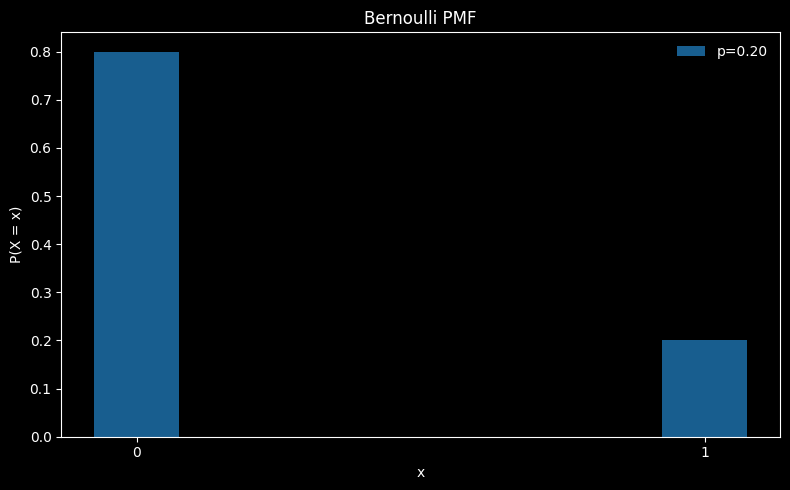

In [162]:
plot_bernoulli_pmf(p=0.2)

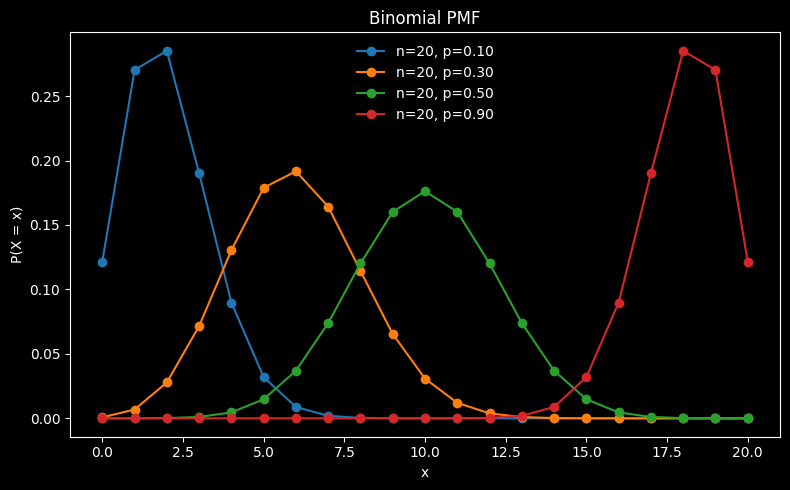

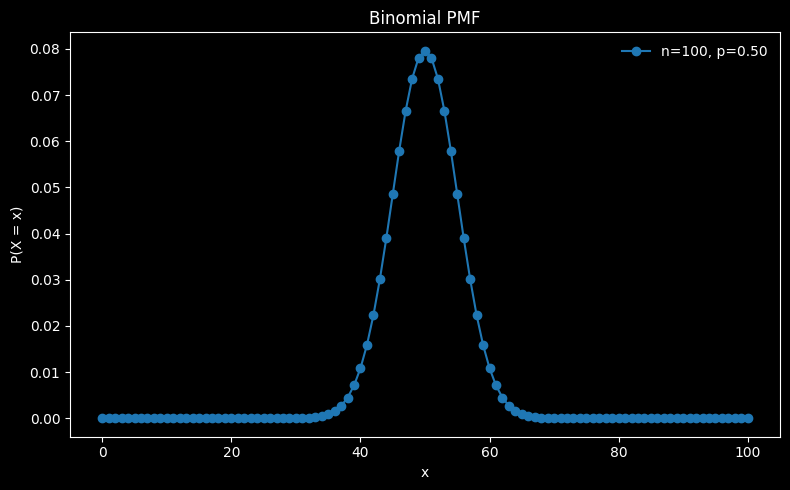

In [163]:
plot_binomial_pmf(n=[20, 20, 20, 20], p=[0.1, 0.3, 0.5, 0.9], out=f"{OUT_DIR}/binomial_multi_varyp.pdf")
plot_binomial_pmf(n=100, p=0.5, out=f"{OUT_DIR}/binomial_n100_p05.pdf")

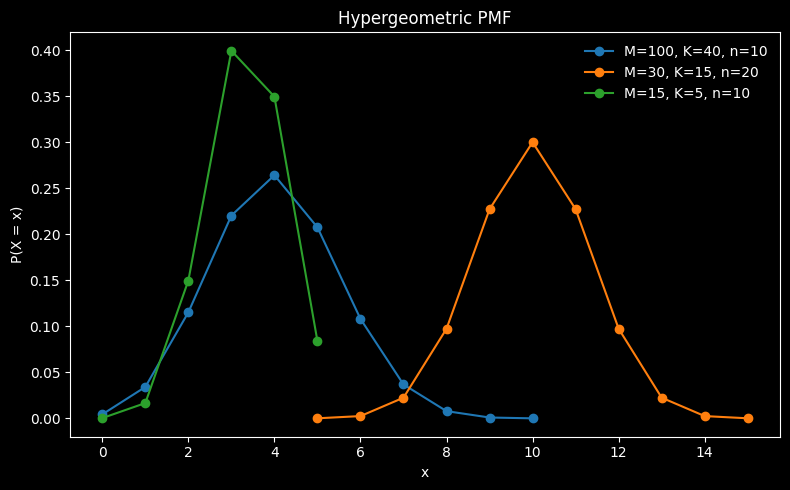

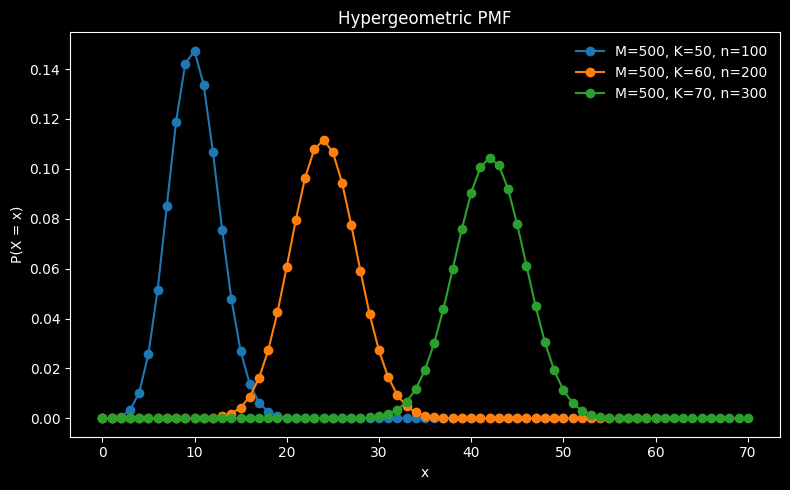

In [164]:
plot_hypergeometric_pmf(M=[100, 30, 15], K=[40, 15, 5], n=[10, 20, 10], out=f"{OUT_DIR}/hypergeometric_pmf_varied.pdf")
plot_hypergeometric_pmf(M=[500, 500, 500], K=[50, 60, 70], n=[100, 200, 300], out=f"{OUT_DIR}/hypergeometric_pmf_approxnormal.pdf")

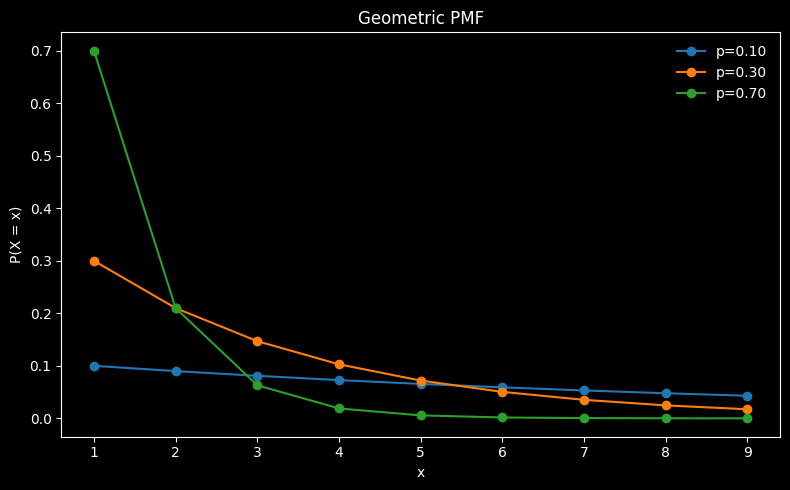

In [165]:
plot_geometric_pmf(p=[0.1, 0.3, 0.7])

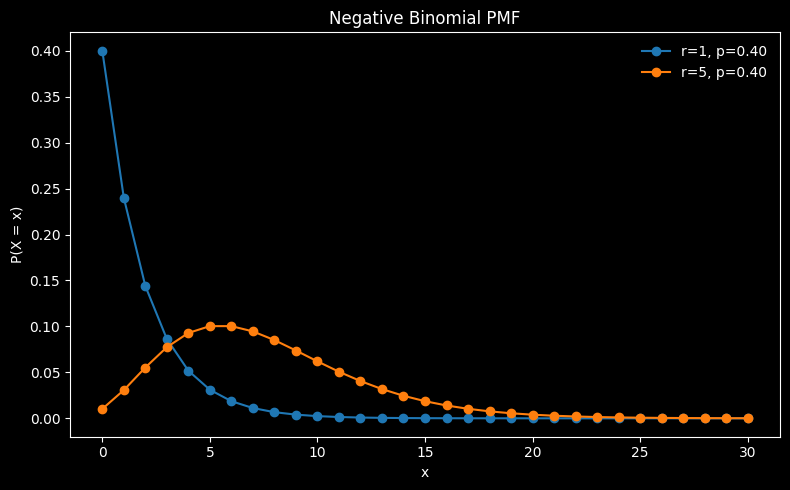

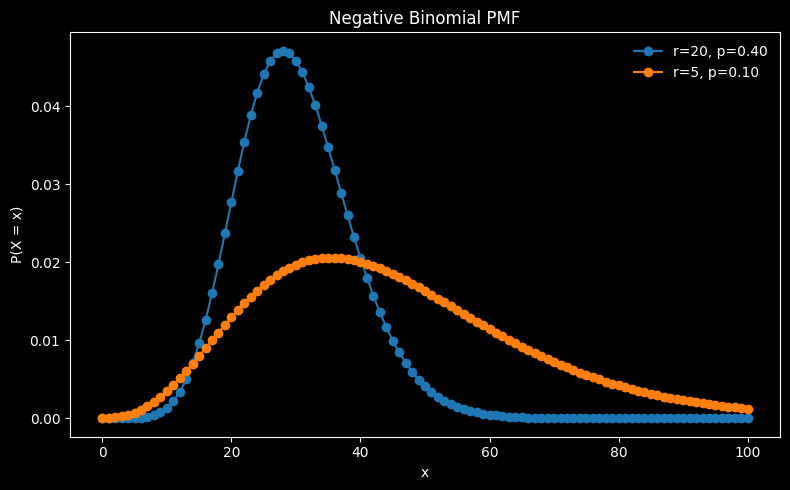

In [166]:
plot_negativebinomial_pmf(r=[1, 5], p=[0.4, 0.4], x_max=30, out=f"{OUT_DIR}/negativebinomial_multi_varyr.pdf")
plot_negativebinomial_pmf(r=[20, 5], p=[0.4, 0.1], x_max=100, out=f"{OUT_DIR}/negativebinomial_multi_varyp.pdf")

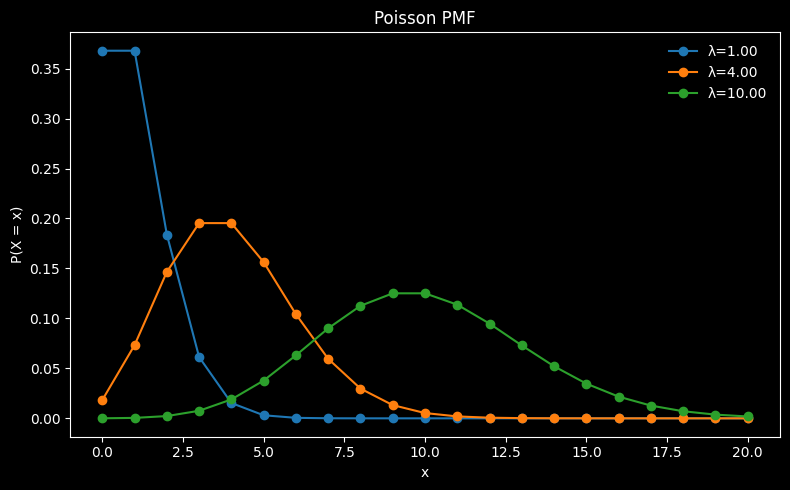

In [167]:
plot_poisson_pmf(lam=[1, 4, 10], x_max=20)

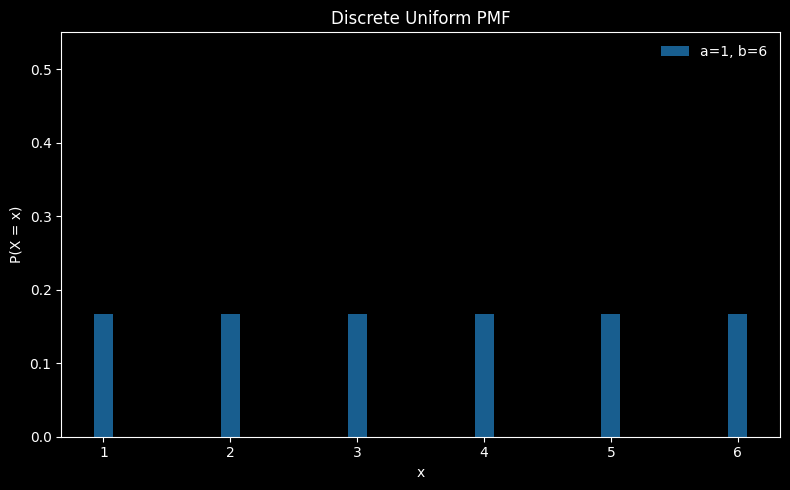

In [168]:
plot_discrete_uniform_pmf(a=1, b=6)

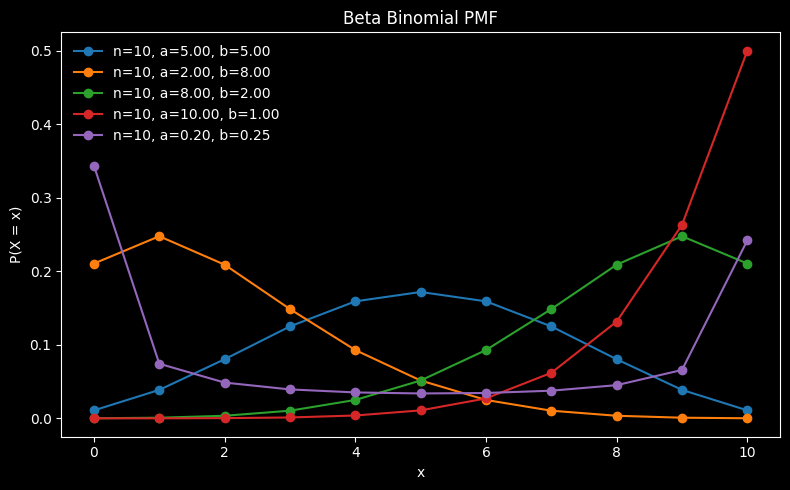

In [169]:
plot_betabinomial_pmf(n=[10, 10, 10, 10, 10], a=[5, 2, 8, 10, 0.2], b=[5, 8, 2, 1, 0.25])

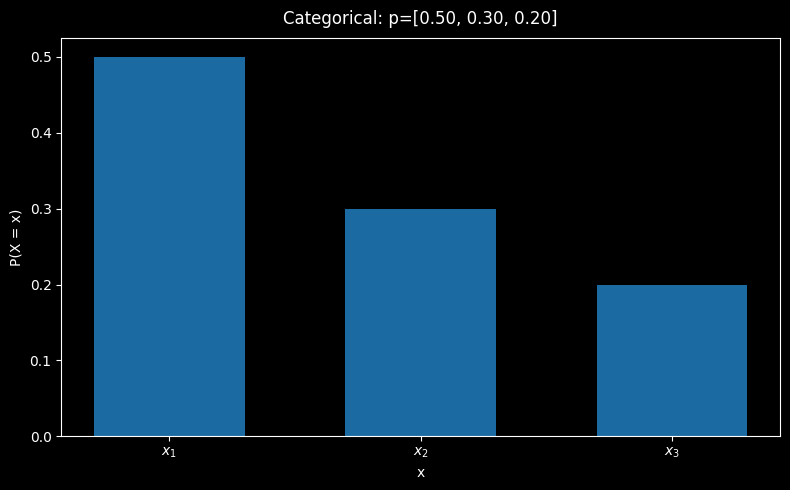

In [170]:
plot_categorical_pmf(p=[0.5, 0.3])

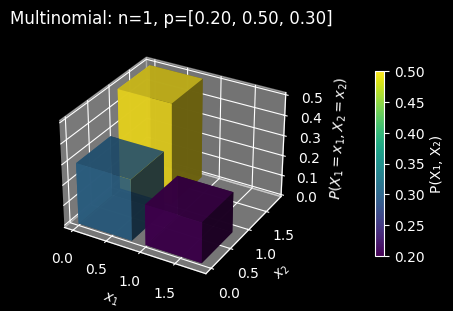

In [171]:
# categorical
plot_multinomial_pmf(n=1, p1=0.2, p2=0.5)

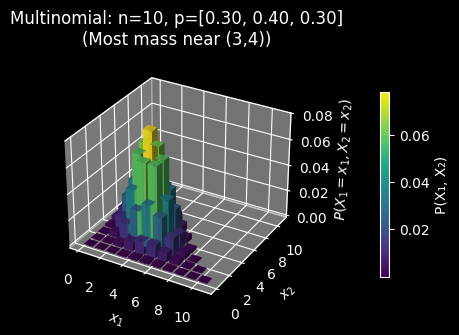

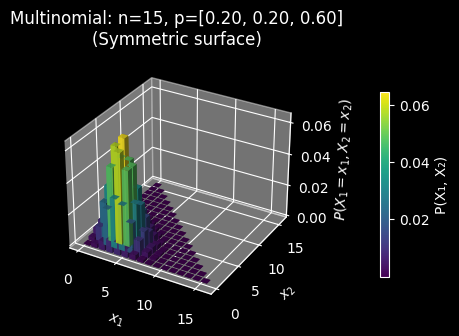

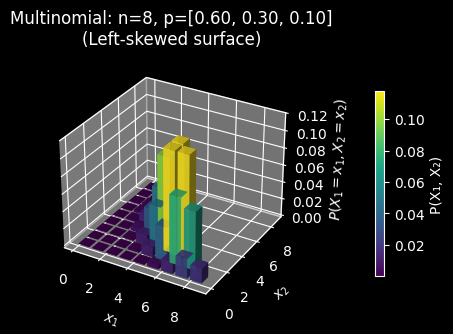

In [172]:
plot_multinomial_pmf(n=10, p1=0.3, p2=0.4, note="Most mass near (3,4)")
plot_multinomial_pmf(n=15, p1=0.2, p2=0.2, note="Symmetric surface")
plot_multinomial_pmf(n=8, p1=0.6, p2=0.3, note="Left-skewed surface")

# Continuous

In [195]:
def plot_pdf_multi(
    xs, pdfs, labels,
    title, dark=True, xrange=None, ylim=None, legend_loc='best', plot_normal=False, out=None, show=True
):
    if dark:
        plt.style.use('dark_background')
    else:
        plt.style.use('default')

    plt.figure(figsize=(5, 3))

    normal_label = None
    if plot_normal is not False:
        if plot_normal is True:
            plot_normal = (0, 1)
        mean, var = plot_normal
        normal_label = f"Normal({mean},{var})"

        global_lo = min(arr[0] for arr in xs)
        global_hi = max(arr[-1] for arr in xs)

        x_norm = np.linspace(global_lo, global_hi, 400)
        pdf_norm = norm.pdf(x_norm, loc=mean, scale=var)

        xs.append(x_norm)
        pdfs.append(pdf_norm)
        labels.append(normal_label)

        title += " (with Normal)"

    for i, (x, pdf) in enumerate(zip(xs, pdfs)):
        label = labels[i]
        color = COLOR_PALETTE[i % len(COLOR_PALETTE)] if label != normal_label else "gray"
        linestyle = '-' if label != normal_label else '--'
        plt.plot(x, pdf, color=color, linestyle=linestyle, lw=2, label=label)

    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    if xrange is not None:
        plt.xlim(xrange)
    if ylim is not None:
        plt.ylim(0, ylim)

    plt.legend(frameon=False, loc=legend_loc)
    plt.tight_layout()

    if out:
        if out is True:
            out = f"{OUT_DIR}/{title.replace(' ','_')}.pdf"
        if os.path.dirname(out):
            os.makedirs(os.path.dirname(out), exist_ok=True)
        plt.savefig(out, bbox_inches="tight")

    if show:
        plt.show()
    else:
        plt.close()


@validate_call
def plot_uniform_pdf(
    a: float | Sequence[float],
    b: float | Sequence[float],
    xrange=None, ylim=None, dark=True, legend_loc='best', plot_normal=False, out=True, show=True
):
    a_vals = np.atleast_1d(a)
    b_vals = np.atleast_1d(b)

    check_params(a_vals, b_vals)

    xs, pdfs, labels = [], [], []

    for i in range(len(a_vals)):
        a_i = a_vals[i % len(a_vals)]
        b_i = b_vals[i % len(b_vals)]
        if b_i <= a_i:
            raise ValueError("Each b must exceed a.")

        x = np.linspace(a_i - 0.1*(b_i-a_i), b_i + 0.1*(b_i-a_i), 400)
        pdf = uniform.pdf(x, loc=a_i, scale=b_i - a_i)

        xs.append(x)
        pdfs.append(pdf)
        labels.append(f"a={a_i}, b={b_i}")

    title = "Uniform Distribution"

    if out is True:
        out = f"{OUT_DIR}/uniform_multi.pdf"

    plot_pdf_multi(xs, pdfs, labels, title, dark=dark, xrange=xrange, ylim=ylim, legend_loc=legend_loc, plot_normal=plot_normal, out=out, show=show)


@validate_call
def plot_normal_pdf(
    mu: float | Sequence[float],
    sigma: float | Sequence[float],
    xrange=None, ylim=None, dark=True, legend_loc='best', plot_normal=False, out=True, show=True
):
    mu_vals = np.atleast_1d(mu)
    sigma_vals = np.atleast_1d(sigma)

    check_params(mu_vals, sigma_vals)

    xs, pdfs, labels = [], [], []

    for i in range(len(mu_vals)):
        mu_i = mu_vals[i % len(mu_vals)]
        sigma_i = sigma_vals[i % len(sigma_vals)]

        x = np.linspace(mu_i - 4*sigma_i, mu_i + 4*sigma_i, 400)
        pdf = norm.pdf(x, mu_i, sigma_i)

        xs.append(x)
        pdfs.append(pdf)
        labels.append(f"μ={mu_i}, σ={sigma_i}")

    title = "Normal Distribution"

    if out is True:
        out = f"{OUT_DIR}/normal_multi.pdf"

    plot_pdf_multi(xs, pdfs, labels, title, dark=dark, xrange=xrange, ylim=ylim, legend_loc=legend_loc, plot_normal=plot_normal, out=out, show=show)


@validate_call
def plot_exponential_pdf(
    lam: float | Sequence[float],
    xrange=None, ylim=None, dark=True, legend_loc='best', plot_normal=False, out=True, show=True
):
    lam_vals = np.atleast_1d(lam)

    xs, pdfs, labels = [], [], []

    for lam_i in lam_vals:
        x = np.linspace(0, 10/lam_i, 400)
        pdf = expon.pdf(x, scale=1/lam_i)

        xs.append(x)
        pdfs.append(pdf)
        labels.append(f"λ={lam_i}")

    title = "Exponential Distribution"

    if out is True:
        out = f"{OUT_DIR}/exponential_multi.pdf"

    plot_pdf_multi(xs, pdfs, labels, title, dark=dark, xrange=xrange, ylim=ylim, legend_loc=legend_loc, plot_normal=plot_normal, out=out, show=show)


@validate_call
def plot_gamma_pdf(
    k: float | Sequence[float],
    theta: float | Sequence[float],
    xrange=None, ylim=None, dark=True, legend_loc='best', plot_normal=False, out=True, show=True
):
    k_vals = np.atleast_1d(k)
    theta_vals = np.atleast_1d(theta)
    check_params(k_vals, theta_vals)

    xs, pdfs, labels = [], [], []

    for i in range(len(k_vals)):
        k_i = k_vals[i % len(k_vals)]
        theta_i = theta_vals[i % len(theta_vals)]

        xmax = gamma.ppf(0.99999, a=k_i, scale=theta_i)
        x = np.linspace(0, xmax, 400)
        pdf = gamma.pdf(x, a=k_i, scale=theta_i)

        xs.append(x)
        pdfs.append(pdf)
        labels.append(f"k={k_i}, θ={theta_i}")

    title = "Gamma Distribution"

    if out is True:
        out = f"{OUT_DIR}/gamma_multi.pdf"

    plot_pdf_multi(xs, pdfs, labels, title, dark=dark, xrange=xrange, ylim=ylim, legend_loc=legend_loc, plot_normal=plot_normal, out=out, show=show)


@validate_call
def plot_beta_pdf(
    a: float | Sequence[float],
    b: float | Sequence[float],
    xrange=None, ylim=None, dark=True, legend_loc='best', plot_normal=False, out=True, show=True
):
    a_vals = np.atleast_1d(a)
    b_vals = np.atleast_1d(b)
    check_params(a_vals, b_vals)

    xs, pdfs, labels = [], [], []

    for i in range(len(a_vals)):
        a_i = a_vals[i % len(a_vals)]
        b_i = b_vals[i % len(b_vals)]

        x = np.linspace(0, 1, 400)
        pdf = beta.pdf(x, a_i, b_i)

        xs.append(x)
        pdfs.append(pdf)
        labels.append(f"α={a_i}, β={b_i}")

    title = "Beta Distribution"

    if out is True:
        out = f"{OUT_DIR}/beta_multi.pdf"

    plot_pdf_multi(xs, pdfs, labels, title, dark=dark, xrange=xrange, ylim=ylim, legend_loc=legend_loc, plot_normal=plot_normal, out=out, show=show)


@validate_call
def plot_weibull_pdf(
    k: float | Sequence[float],
    scale: float | Sequence[float],
    xrange=None, ylim=None, dark=True, legend_loc='best', plot_normal=False, out=True, show=True
):
    k_vals = np.atleast_1d(k)
    scale_vals = np.atleast_1d(scale)
    check_params(k_vals, scale_vals)

    xs, pdfs, labels = [], [], []

    for i in range(len(k_vals)):
        k_i = k_vals[i % len(k_vals)]
        scale_i = scale_vals[i % len(scale_vals)]

        x = np.linspace(0, scale_i * 5, 400)
        pdf = weibull_min.pdf(x, c=k_i, scale=scale_i)

        xs.append(x)
        pdfs.append(pdf)
        labels.append(f"k={k_i}, λ={scale_i}")

    title = "Weibull Distribution"

    if out is True:
        out = f"{OUT_DIR}/weibull_multi.pdf"

    plot_pdf_multi(xs, pdfs, labels, title, dark=dark, xrange=xrange, ylim=ylim, legend_loc=legend_loc, plot_normal=plot_normal, out=out, show=show)


@validate_call
def plot_pareto_pdf(
    alpha: float | Sequence[float],
    xm: float | Sequence[float],
    xrange=None, ylim=None, dark=True, legend_loc='best', plot_normal=False, out=True, show=True
):
    alpha_vals = np.atleast_1d(alpha)
    xm_vals = np.atleast_1d(xm)
    check_params(alpha_vals, xm_vals)

    xs, pdfs, labels = [], [], []

    for i in range(len(alpha_vals)):
        a_i = alpha_vals[i % len(alpha_vals)]
        xm_i = xm_vals[i % len(xm_vals)]

        x = np.linspace(xm_i, xm_i * 10, 400)
        pdf = pareto.pdf(x, b=a_i, scale=xm_i)

        xs.append(x)
        pdfs.append(pdf)
        labels.append(f"α={a_i}, xₘ={xm_i}")

    title = "Pareto Distribution"

    if ylim is None:
        ylim = max(alpha_vals)

    if out is True:
        out = f"{OUT_DIR}/pareto_multi.pdf"

    plot_pdf_multi(xs, pdfs, labels, title, dark=dark, xrange=xrange, ylim=ylim, legend_loc=legend_loc, plot_normal=plot_normal, out=out, show=show)


@validate_call
def plot_cauchy_pdf(
    x0: float | Sequence[float],
    gamma_: float | Sequence[float],
    xrange=None, ylim=None, dark=True, legend_loc='best', plot_normal=False, out=True, show=True
):
    x0_vals = np.atleast_1d(x0)
    gamma_vals = np.atleast_1d(gamma_)
    check_params(x0_vals, gamma_vals)

    xs, pdfs, labels = [], [], []

    for i in range(len(x0_vals)):
        x0_i = x0_vals[i % len(x0_vals)]
        g_i = gamma_vals[i % len(gamma_vals)]

        lo = x0_i - 10*g_i
        hi = x0_i + 10*g_i
        x = np.linspace(lo, hi, 400)
        pdf = cauchy.pdf(x, loc=x0_i, scale=g_i)

        xs.append(x)
        pdfs.append(pdf)
        labels.append(f"x₀={x0_i}, γ={g_i}")

    title = "Cauchy Distribution"

    if out is True:
        out = f"{OUT_DIR}/cauchy_multi.pdf"

    plot_pdf_multi(xs, pdfs, labels, title, dark=dark, xrange=xrange, ylim=ylim, legend_loc=legend_loc, plot_normal=plot_normal, out=out, show=show)


@validate_call
def plot_logistic_pdf(
    mu: float | Sequence[float],
    s: float | Sequence[float],
    xrange=None, ylim=None, dark=True, legend_loc='best', plot_normal=False, out=True, show=True
):
    mu_vals = np.atleast_1d(mu)
    s_vals = np.atleast_1d(s)
    check_params(mu_vals, s_vals)

    xs, pdfs, labels = [], [], []

    for i in range(len(mu_vals)):
        mu_i = mu_vals[i % len(mu_vals)]
        s_i = s_vals[i % len(s_vals)]

        lo = mu_i - 6*s_i
        hi = mu_i + 6*s_i
        x = np.linspace(lo, hi, 400)
        pdf = logistic.pdf(x, loc=mu_i, scale=s_i)

        xs.append(x)
        pdfs.append(pdf)
        labels.append(f"μ={mu_i}, s={s_i}")

    title = "Logistic Distribution"

    if out is True:
        out = f"{OUT_DIR}/logistic_multi.pdf"

    plot_pdf_multi(xs, pdfs, labels, title, dark=dark, xrange=xrange, ylim=ylim, legend_loc=legend_loc, plot_normal=plot_normal, out=out, show=show)


@validate_call
def plot_gumbel_pdf(
    mu: float | Sequence[float],         # location
    beta: float | Sequence[float],       # scale > 0
    xrange=None, ylim=None, dark=True,
    legend_loc="best", plot_normal=False,
    out=True, show=True
):
    mu_vals   = np.atleast_1d(mu)
    beta_vals = np.atleast_1d(beta)
    check_params(mu_vals, beta_vals)

    xs, pdfs, labels = [], [], []

    for i in range(len(mu_vals)):
        mu_i   = mu_vals[i % len(mu_vals)]
        beta_i = beta_vals[i % len(beta_vals)]

        # Gumbel has an exponential tail → symmetric 8–10 betas looks good
        lo = mu_i - 8 * beta_i
        hi = mu_i + 8 * beta_i

        x = np.linspace(lo, hi, 400)
        pdf = gumbel_r.pdf(x, loc=mu_i, scale=beta_i)

        xs.append(x)
        pdfs.append(pdf)
        labels.append(f"μ={mu_i}, β={beta_i}")

    title = "Gumbel Distribution"

    if out is True:
        out = f"{OUT_DIR}/gumbel_multi.pdf"

    plot_pdf_multi(
        xs, pdfs, labels, title,
        dark=dark, xrange=xrange, ylim=ylim,
        legend_loc=legend_loc, plot_normal=plot_normal,
        out=out, show=show
    )


@validate_call
def plot_laplace_pdf(
    mu: float | Sequence[float],
    b: float | Sequence[float],   # scale > 0
    xrange=None, ylim=None, dark=True,
    legend_loc='best', plot_normal=False,
    out=True, show=True
):
    mu_vals = np.atleast_1d(mu)
    b_vals  = np.atleast_1d(b)
    check_params(mu_vals, b_vals)

    xs, pdfs, labels = [], [], []

    for i in range(len(mu_vals)):
        mu_i = mu_vals[i % len(mu_vals)]
        b_i  = b_vals[i % len(b_vals)]

        # Laplace is symmetric; use a wide window
        lo = mu_i - 10 * b_i
        hi = mu_i + 10 * b_i

        x = np.linspace(lo, hi, 400)
        pdf = laplace.pdf(x, loc=mu_i, scale=b_i)

        xs.append(x)
        pdfs.append(pdf)
        labels.append(f"μ={mu_i}, b={b_i}")

    title = "Laplace Distribution"

    if out is True:
        out = f"{OUT_DIR}/laplace_multi.pdf"

    plot_pdf_multi(
        xs, pdfs, labels, title,
        dark=dark, xrange=xrange, ylim=ylim,
        legend_loc=legend_loc, plot_normal=plot_normal,
        out=out, show=show
    )


@validate_call
def plot_lognormal_pdf(
    mu: float | Sequence[float],
    sigma: float | Sequence[float],
    xrange=None, ylim=None, dark=True, legend_loc='best', plot_normal=False, out=True, show=True
):
    mu_vals = np.atleast_1d(mu)
    sigma_vals = np.atleast_1d(sigma)
    check_params(mu_vals, sigma_vals)

    xs, pdfs, labels = [], [], []

    for i in range(len(mu_vals)):
        mu_i = mu_vals[i % len(mu_vals)]
        s_i = sigma_vals[i % len(sigma_vals)]

        x = np.linspace(0, np.exp(mu_i + 4*s_i), 400)
        pdf = lognorm.pdf(x, s=s_i, scale=np.exp(mu_i))

        xs.append(x)
        pdfs.append(pdf)
        labels.append(f"μ={mu_i}, σ={s_i}")

    title = "Lognormal Distribution"

    if out is True:
        out = f"{OUT_DIR}/lognormal_multi.pdf"

    plot_pdf_multi(xs, pdfs, labels, title, dark=dark, xrange=xrange, ylim=ylim, legend_loc=legend_loc, plot_normal=plot_normal, out=out, show=show)


@validate_call
def plot_t_pdf(
    df_: float | Sequence[float],
    xrange=None, ylim=None, dark=True, legend_loc='best', plot_normal=False, out=True, show=True
):
    df_vals = np.atleast_1d(df_)

    xs, pdfs, labels = [], [], []

    for df_i in df_vals:
        x = np.linspace(-6, 6, 400)
        pdf = t.pdf(x, df_i)

        xs.append(x)
        pdfs.append(pdf)
        labels.append(f"ν={df_i}")

    title = "Student-t Distribution"

    if out is True:
        out = f"{OUT_DIR}/t_multi.pdf"

    plot_pdf_multi(xs, pdfs, labels, title, dark=dark, xrange=xrange, ylim=ylim, legend_loc=legend_loc, plot_normal=plot_normal, out=out, show=show)


@validate_call
def plot_chi2_pdf(
    k: float | Sequence[float],
    xrange=None, ylim=None, dark=True, legend_loc='best', plot_normal=False, out=True, show=True
):
    k_vals = np.atleast_1d(k)

    xs, pdfs, labels = [], [], []

    for k_i in k_vals:
        x = np.linspace(0, k_i * 5, 400)
        pdf = chi2.pdf(x, df=k_i)

        xs.append(x)
        pdfs.append(pdf)
        labels.append(f"k={k_i}")

    title = "Chi-squared Distribution"

    if out is True:
        out = f"{OUT_DIR}/chi2_multi.pdf"

    plot_pdf_multi(xs, pdfs, labels, title, dark=dark, xrange=xrange, ylim=ylim, legend_loc=legend_loc, plot_normal=plot_normal, out=out, show=show)


@validate_call
def plot_multivariate_normal_pdf(
    mu_x: Annotated[float, Field(description="Mean of X")],
    mu_y: Annotated[float, Field(description="Mean of Y")],
    sigma_x: Annotated[float, Field(gt=0, description="Std dev of X")],
    sigma_y: Annotated[float, Field(gt=0, description="Std dev of Y")],
    rho: Annotated[float, Field(ge=-0.999, le=0.999, description="Correlation coefficient")],
    note: str | None = None,
    dark: bool = True,
    out: bool | str = True,
    show: bool = True
):
    """Plot 3D surface of a 2D multivariate normal PDF."""

    # Mean vector and covariance matrix
    mu = np.array([mu_x, mu_y])
    cov = np.array([
        [sigma_x**2, rho * sigma_x * sigma_y],
        [rho * sigma_x * sigma_y, sigma_y**2]
    ])
    dist = multivariate_normal(mean=mu, cov=cov)

    # Create grid
    x = np.linspace(mu_x - 4 * sigma_x, mu_x + 4 * sigma_x, 150)
    y = np.linspace(mu_y - 4 * sigma_y, mu_y + 4 * sigma_y, 150)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))
    Z = dist.pdf(pos)

    # Plot
    if dark:
        plt.style.use('dark_background')  # go to dark mode
    fig = plt.figure(figsize=(5, 4))
    ax = fig.add_subplot(111, projection='3d')

    norm = mcolors.Normalize(vmin=np.min(Z), vmax=np.max(Z))
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', linewidth=0, antialiased=True, alpha=0.9)

    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_zlabel("$f(x, y)$")

    title = f"Multivariate Normal: μ=({mu_x}, {mu_y}), σ=({sigma_x}, {sigma_y}), ρ={rho}"
    if note:
        title += f"\n({note})"
    ax.set_title(title, pad=10)

    fig.colorbar(surf, ax=ax, shrink=0.6, pad=0.2, label="PDF height")

    if dark:
        plt.style.use('default')  # revert back

    # Output
    if out is True:
        out = f"{OUT_DIR}/mvnormal_pdf_mu{mu_x:.2f}_{mu_y:.2f}_rho{rho:.2f}".replace(".", "") + ".pdf"
    if out:
        import os
        if os.path.dirname(out):
            os.makedirs(os.path.dirname(out), exist_ok=True)
        plt.savefig(out, bbox_inches="tight")

    if show:
        plt.show()
    else:
        plt.close()

@validate_call
def plot_dirichlet_pdf(
    a1: Annotated[float, Field(gt=0, description="α₁")],
    a2: Annotated[float, Field(gt=0, description="α₂")],
    a3: Annotated[float, Field(gt=0, description="α₃")],
    note: str | None = None,
    dark: bool = True,
    out: bool | str = True,
    show: bool = True
):
    alpha = np.array([a1, a2, a3])
    dist = dirichlet(alpha)
    title = f"Dirichlet: α=[{a1:.2f}, {a2:.2f}, {a3:.2f}]"
    if note:
        title += f"\n({note})"

    # Create simplex grid
    grid_points = 150
    x = np.linspace(0, 1, grid_points)
    y = np.linspace(0, 1, grid_points)
    X, Y = np.meshgrid(x, y)

    mask = (X + Y) < 1
    X_valid = X[mask]
    Y_valid = Y[mask]
    Z_valid = 1 - X_valid - Y_valid

    # ✅ Correct shape for SciPy: (k, n)
    pts = np.vstack([X_valid, Y_valid, Z_valid])
    pdf = dist.pdf(pts)  # shape: (n,)

    # === Plot 3D surface ===
    if dark:
        plt.style.use('dark_background')  # go to dark mode
    fig = plt.figure(figsize=(5, 4))
    ax = fig.add_subplot(111, projection="3d")

    norm = mcolors.Normalize(vmin=np.min(pdf), vmax=np.max(pdf))
    ax.plot_trisurf(X_valid, Y_valid, pdf, cmap="plasma", linewidth=0.05, antialiased=True, alpha=0.95)

    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.set_zlabel("$f(x_1, x_2)$")
    ax.set_title(title, pad=10)

    mappable = cm.ScalarMappable(norm=norm, cmap="plasma")
    fig.colorbar(mappable, ax=ax, shrink=0.6, pad=0.2, label="PDF density")

    if dark:
        plt.style.use('default')  # revert back

    if out is True:
        out = f"{OUT_DIR}/dirichlet_pdf_a{a1:.2f}_{a2:.2f}_{a3:.2f}".replace(".", "") + ".pdf"
    if out:
        if os.path.dirname(out):
            os.makedirs(os.path.dirname(out), exist_ok=True)
        plt.savefig(out, bbox_inches="tight")

    if show:
        plt.show()
    else:
        plt.close()

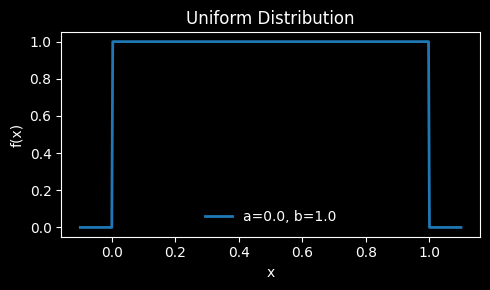

In [174]:
plot_uniform_pdf(0, 1)

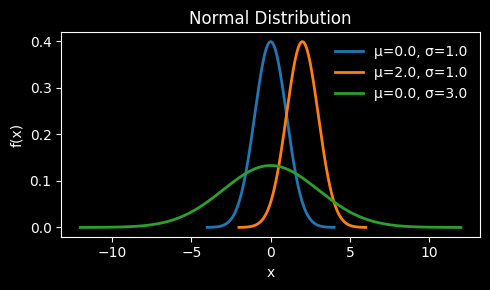

In [175]:
plot_normal_pdf([0, 2, 0], [1, 1, 3])

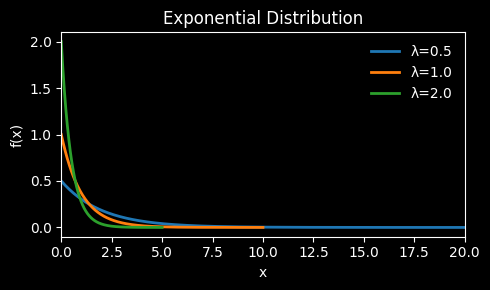

In [176]:
plot_exponential_pdf([0.5, 1, 2], xrange=[0, 20])

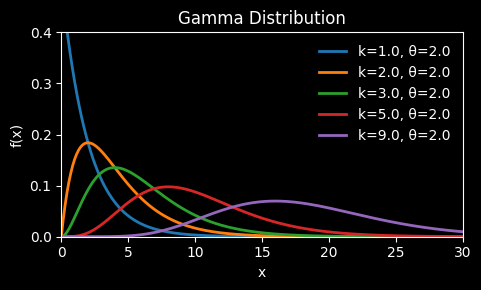

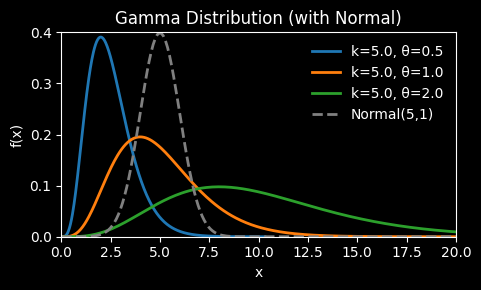

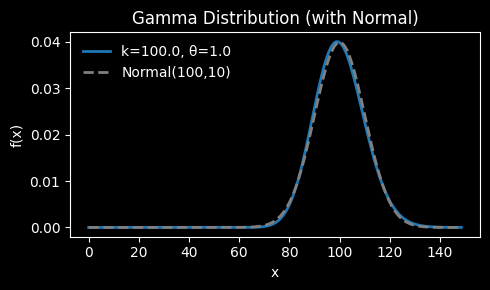

In [177]:
plot_gamma_pdf(k=[1, 2, 3, 5, 9], theta=[2, 2, 2, 2, 2], xrange=(0, 30), ylim=0.4, out=f"{OUT_DIR}/gamma_multi_varyk.pdf")
plot_gamma_pdf(k=[5, 5, 5], theta=[0.5, 1, 2], xrange=(0, 20), ylim=0.4, plot_normal=(5,1), out=f"{OUT_DIR}/gamma_multi_varytheta.pdf")
plot_gamma_pdf(k=100, theta=1, plot_normal=(100,10), out=f"{OUT_DIR}/gamma_multi_bigk.pdf")

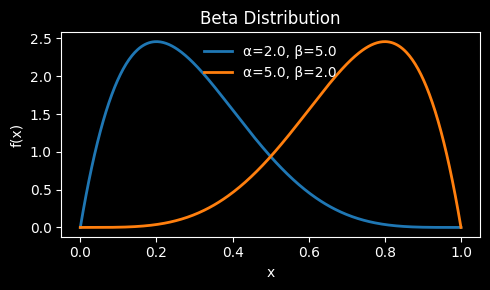

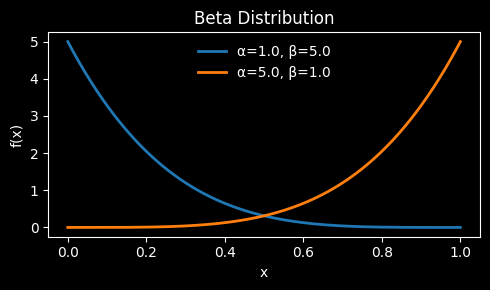

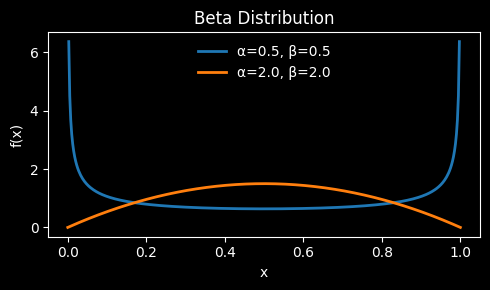

In [178]:
plot_beta_pdf(a=[2, 5], b=[5, 2], legend_loc='upper center', out=f"{OUT_DIR}/beta_gaussianlike.pdf")
plot_beta_pdf(a=[1, 5], b=[5, 1], legend_loc='upper center', out=f"{OUT_DIR}/beta_exponentiallike.pdf")
plot_beta_pdf(a=[0.5, 2], b=[0.5, 2], legend_loc='upper center', out=f"{OUT_DIR}/beta_uniformlike.pdf")

/Users/joeyrich/miniconda3/envs/pydicom_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:2757: RuntimeWarning: divide by zero encountered in power
  return c*pow(x, c-1)*np.exp(-pow(x, c))


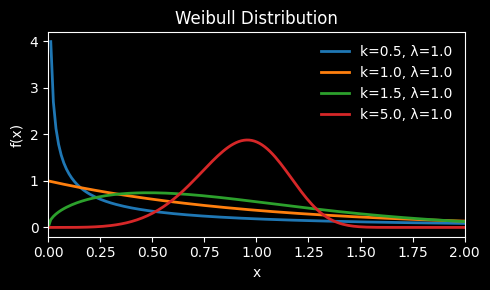

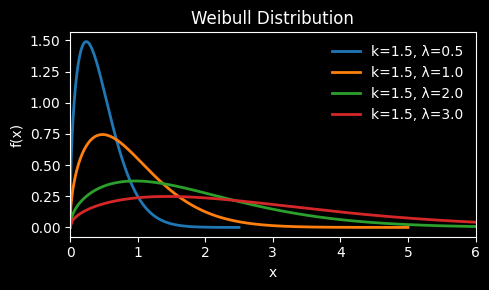

In [179]:
plot_weibull_pdf(k=[0.5, 1, 1.5, 5], scale=[1, 1, 1, 1], xrange=(0, 2), out=f"{OUT_DIR}/weibull_multi_varyk.pdf")
plot_weibull_pdf(k=[1.5, 1.5, 1.5, 1.5], scale=[0.5, 1, 2, 3], xrange=(0, 6), out=f"{OUT_DIR}/weibull_multi_varyscale.pdf")

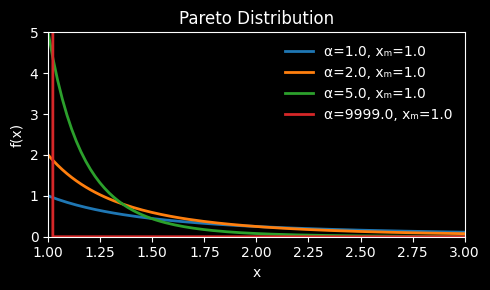

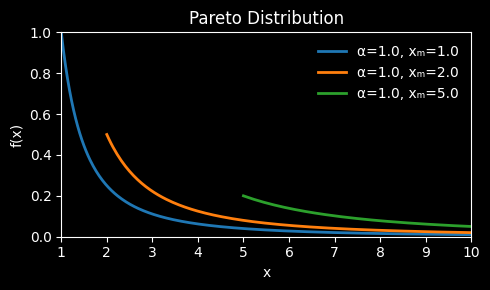

In [180]:
plot_pareto_pdf(alpha=[1, 2, 5, 9999], xm=[1, 1, 1, 1], xrange=(1, 3), ylim=5)
plot_pareto_pdf(alpha=[1, 1, 1], xm=[1, 2, 5], xrange=(1, 10))


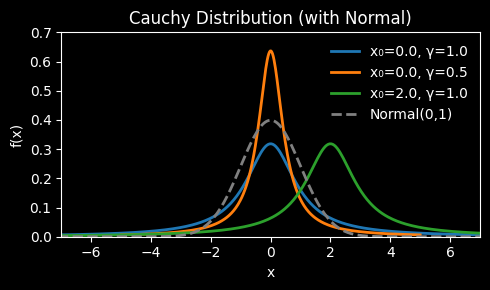

In [181]:
plot_cauchy_pdf(x0=[0, 0, 2], gamma_=[1, 0.5, 1], xrange=(-7, 7), ylim=0.7, plot_normal=True)

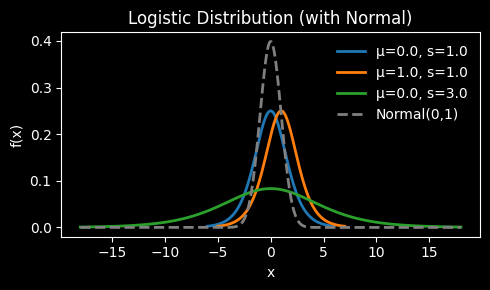

In [182]:
plot_logistic_pdf(mu=[0, 1, 0], s=[1, 1, 3], plot_normal=True)

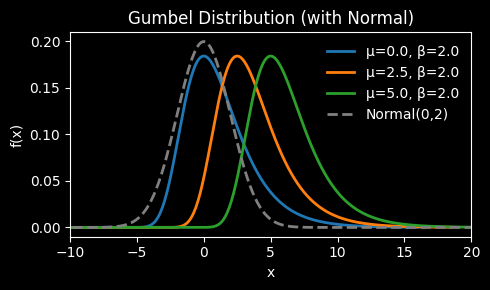

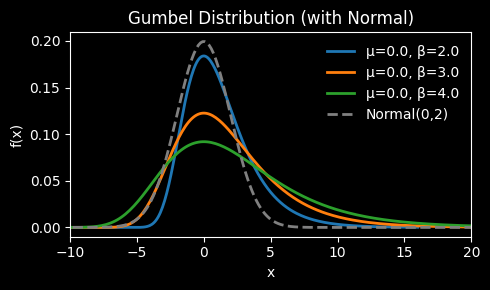

In [212]:
plot_gumbel_pdf(mu=[0, 2.5, 5], beta=[2, 2, 2], xrange=(-10, 20), plot_normal=(0,2), out=f"{OUT_DIR}/gumbel_multi_varymu.pdf")
plot_gumbel_pdf(mu=[0, 0, 0], beta=[2, 3, 4], xrange=(-10, 20), plot_normal=(0,2), out=f"{OUT_DIR}/gumbel_multi_varybeta.pdf")

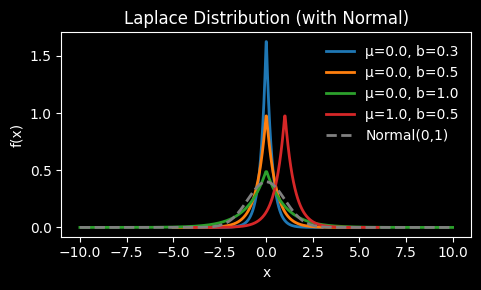

In [193]:
plot_laplace_pdf(mu=[0, 0, 0, 1], b=[0.3, 0.5, 1, 0.5], plot_normal=True)

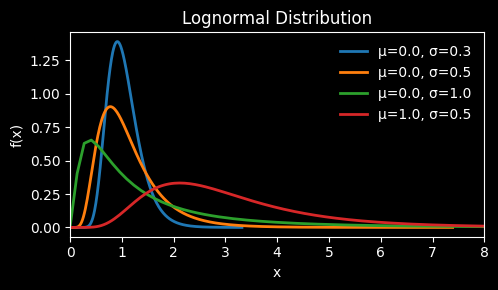

In [183]:
plot_lognormal_pdf(mu=[0, 0, 0, 1], sigma=[0.3, 0.5, 1, 0.5], xrange=(0,8))

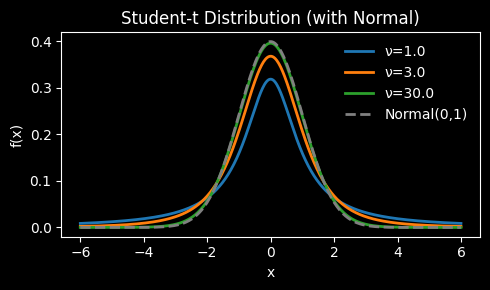

In [184]:
plot_t_pdf(df_=[1, 3, 30], plot_normal=True)

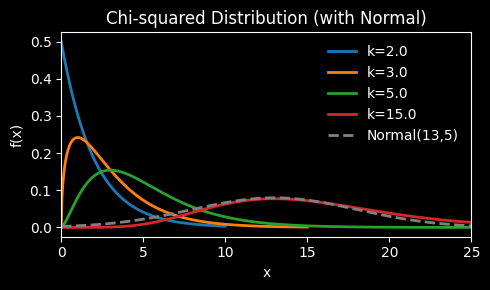

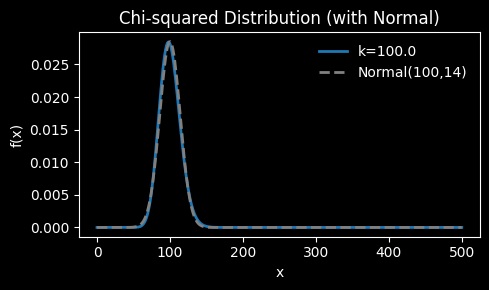

In [185]:
plot_chi2_pdf(k=[2, 3, 5, 15], xrange=(0, 25), plot_normal=(13, 5))
plot_chi2_pdf(k=100, plot_normal=(100, 14), out=f"{OUT_DIR}/chi2_multi_bigk.pdf")

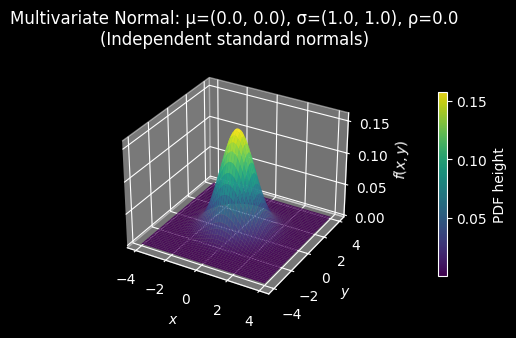

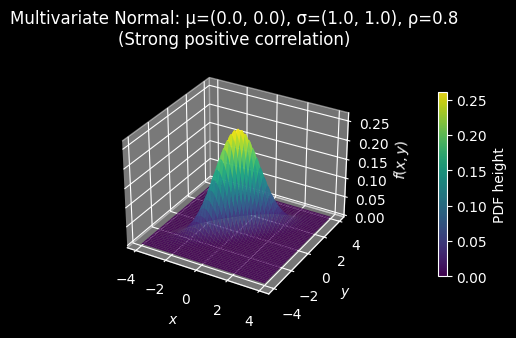

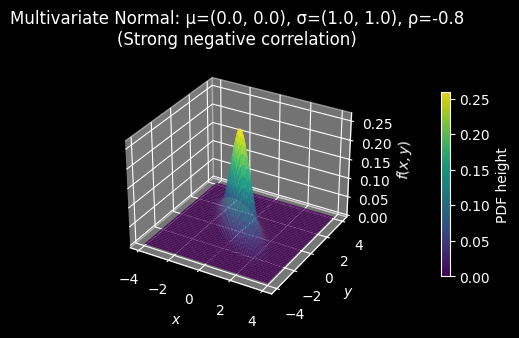

In [186]:
plot_multivariate_normal_pdf(mu_x=0, mu_y=0, sigma_x=1, sigma_y=1, rho=0.0, note="Independent standard normals")
plot_multivariate_normal_pdf(mu_x=0, mu_y=0, sigma_x=1, sigma_y=1, rho=0.8, note="Strong positive correlation")
plot_multivariate_normal_pdf(mu_x=0, mu_y=0, sigma_x=1, sigma_y=1, rho=-0.8, note="Strong negative correlation")

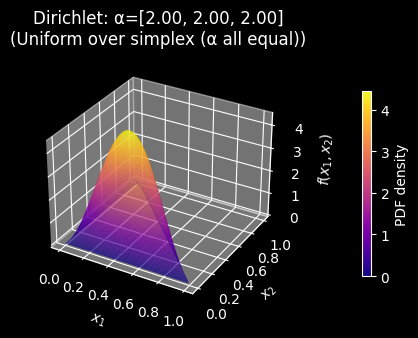

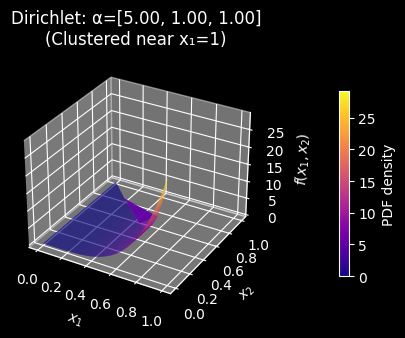

In [187]:
plot_dirichlet_pdf(2, 2, 2, note="Uniform over simplex (α all equal)")
plot_dirichlet_pdf(5, 1, 1, note="Clustered near x₁=1")